In [22]:
import pandas as pd

In [23]:
df = pd.read_csv("data/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [24]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [25]:
## No missing values

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [27]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [28]:
### Remove id column if present
## df = df.drop(labels = ["id"], axis=1)
## df.head()

In [29]:
df.duplicated().sum()

126

In [30]:
numerical_columns = df.columns[df.dtypes != 'object']
categocal_columns = df.columns[df.dtypes == 'object']

print("numerical_columns: ", numerical_columns)
print("categocal_columns: ", categocal_columns)

numerical_columns:  Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
categocal_columns:  Index(['cut', 'color', 'clarity'], dtype='object')


In [31]:
df[categocal_columns].describe()

,cut,color,clarity
count,50000,50000,50000
unique,5,7,8
top,Ideal,G,SI1
freq,19938,10452,12115


In [32]:
df['cut'].value_counts()

cut
Ideal        19938
Premium      12806
Very Good    11204
Good          4557
Fair          1495
Name: count, dtype: int64

In [33]:
df['color'].value_counts()

color
G    10452
E     9085
F     8864
H     7711
D     6224
I     5058
J     2606
Name: count, dtype: int64

In [34]:
df['clarity'].value_counts()

clarity
SI1     12115
VS2     11404
SI2      8519
VS1      7579
VVS2     4694
VVS1     3369
IF       1632
I1        688
Name: count, dtype: int64

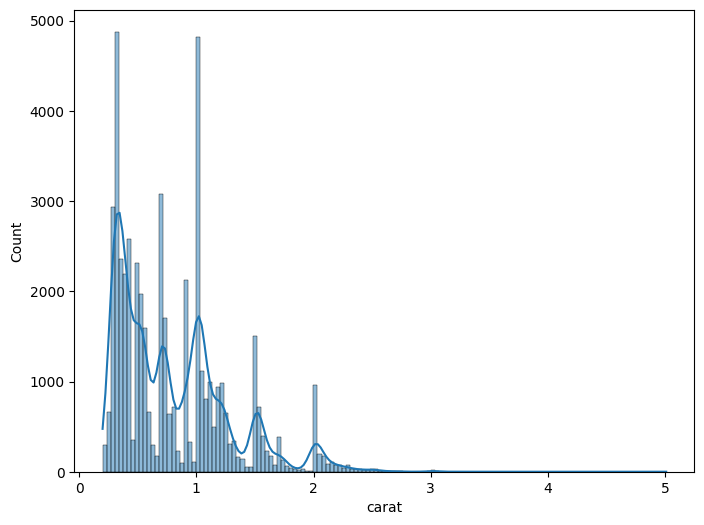

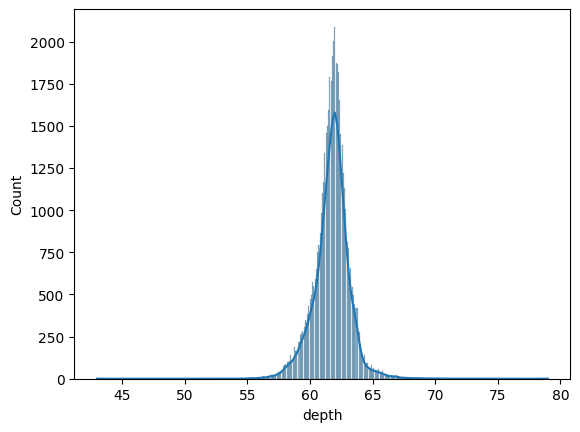

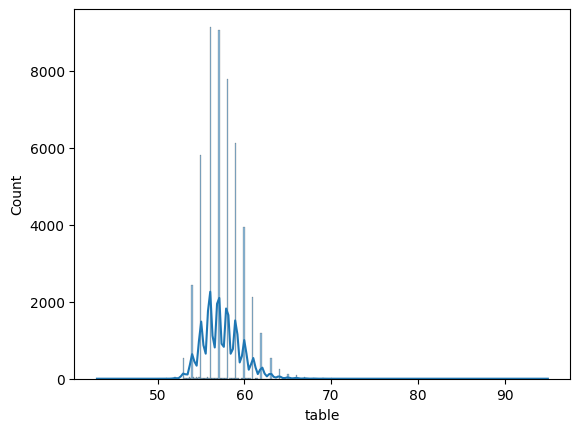

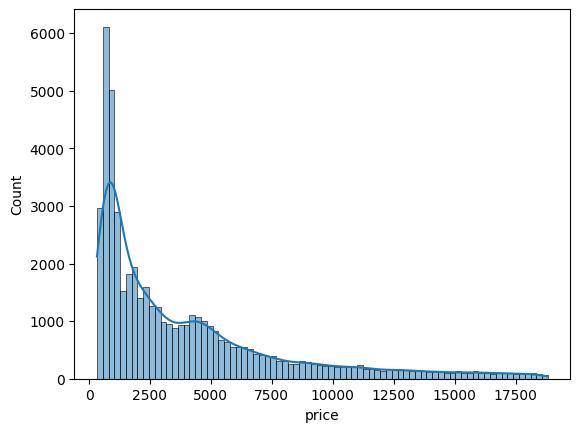

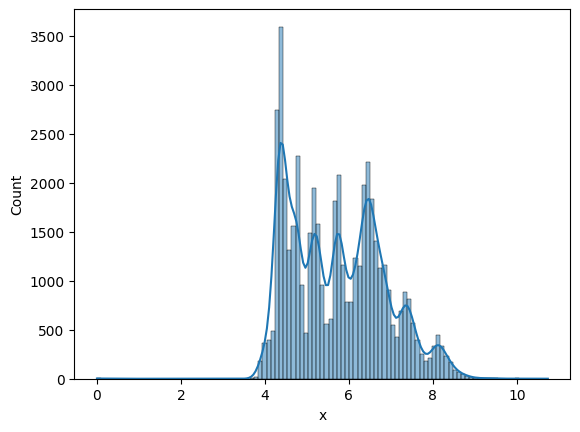

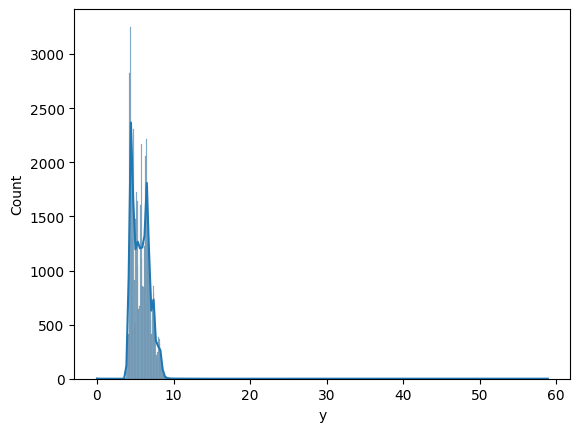

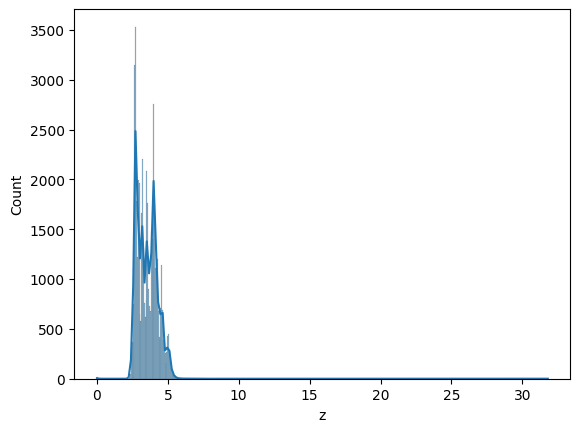

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

x=0

for i in numerical_columns:
    sns.histplot(data = df, x = i, kde = True)
    print("\n")
    plt.show()

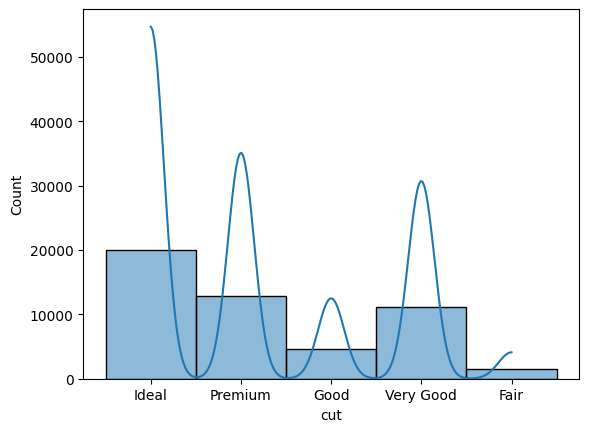

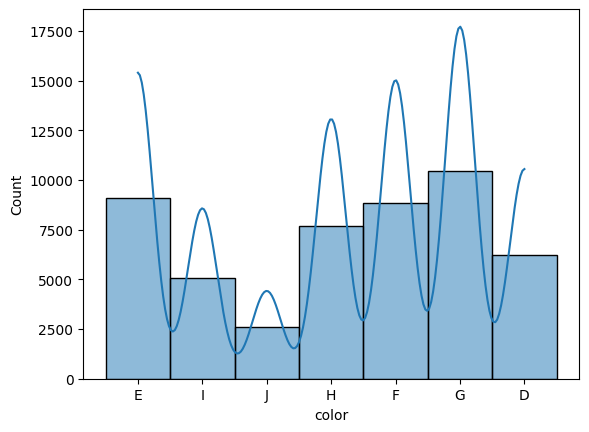

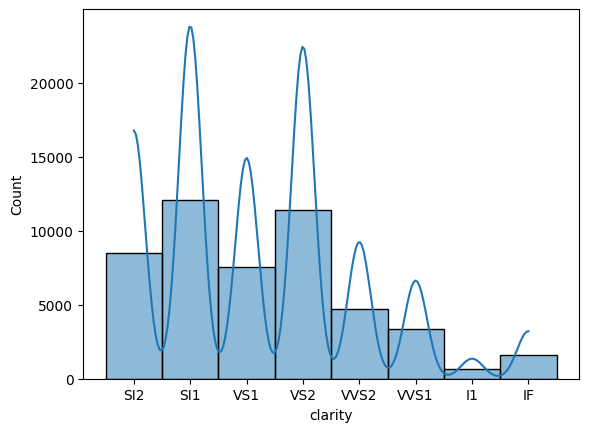

In [41]:
x=0

for i in categocal_columns:
    sns.histplot(data = df, x = i, kde = True)
    print("\n")
    plt.show()

<Axes: >

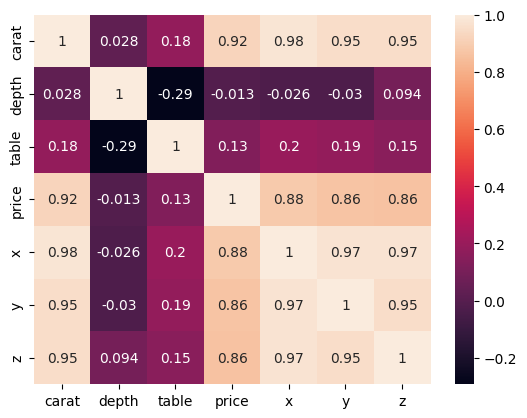

In [44]:
## Correlation
sns.heatmap(df[numerical_columns].corr(), annot=True)

In [46]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [47]:
cut_map = {'Fair': 1, 'Good':2, 'Very Good': 3, 'Premium': 4, 'Ideal':5}

In [48]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [49]:
clarity_map = {'I1': 1, 'SI2':2, 'SI1': 3, 'VS2': 4, 'VS1':5, 'VVS2': 6, 'VVS1':7, 'IF': 8}

In [50]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [51]:
color_map = {'D': 1, 'E':2, 'F': 3, 'G': 4, 'H':5, 'I': 6, 'J':7}

In [52]:
df['cut'] = df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)